In [66]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense#Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import relu

In [54]:
df = pd.read_csv(r"C:\Users\nirma\Downloads\Advertising (3).csv")

In [58]:
df.duplicated().sum()

0

In [60]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(3,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

C:\Users\nirma\anaconda25\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [70]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [72]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [92]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\nirma\anaconda25\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_val, y_val), verbose=1)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 235.7275 - mae: 14.4845 - val_loss: 193.7006 - val_mae: 12.8092
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 229.7983 - mae: 14.3289 - val_loss: 178.9418 - val_mae: 12.2348
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 219.9719 - mae: 13.7861 - val_loss: 158.1286 - val_mae: 11.3816
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 180.8537 - mae: 12.5337 - val_loss: 132.7097 - val_mae: 10.2434
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 170.4622 - mae: 12.0138 - val_loss: 107.5274 - val_mae: 8.9689
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 127.5136 - mae: 10.2750 - val_loss: 82.9618 - val_mae: 7.6978
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 93.9038 - mae: 8.3763 - val_loss: 62.9684 - val_mae: 6.4671
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 75.8527 - mae: 7.2526 - val_loss: 50.2469 - val_mae: 5.4136
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

In [94]:
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"mean_Squared_error:{mse},mean_absolute_error:{mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
mean_Squared_error:185.95371312331793,mean_absolute_error:12.690998659416412


In [98]:
import matplotlib.pyplot as plt

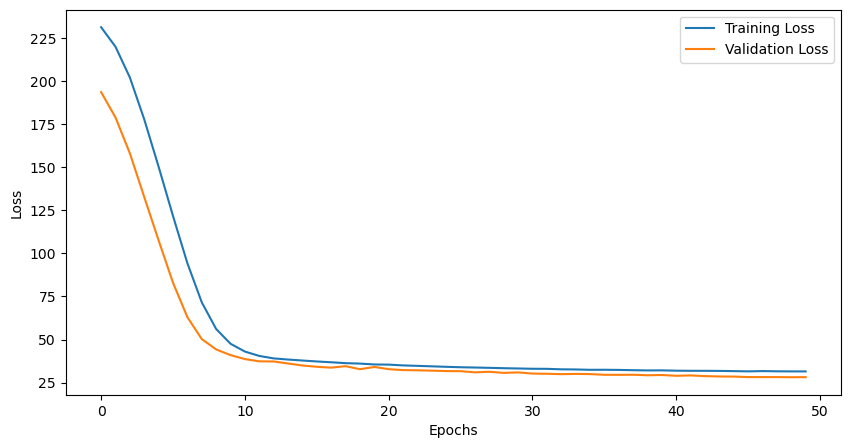

In [118]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [116]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)